In [4]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [8]:
# 연도만 추출하여 새로운 열(year) 만들기
sales['year'] = sales['datesold'].dt.year
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [9]:
import numpy as np

# round 메소드 :
# groupby 메소드 : 
# agg 메소드 : 
result = np.round(sales.groupby('year')['price'].agg("mean"), 1)
result

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

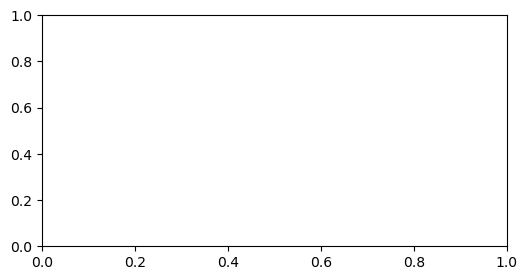

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.show()

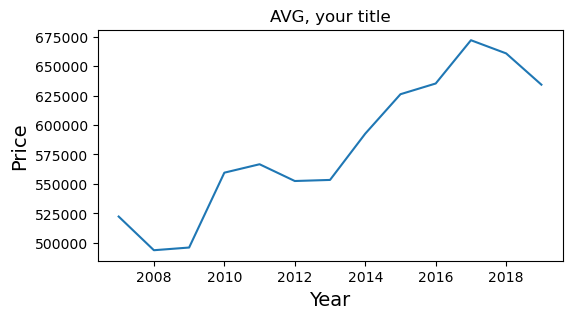

In [19]:
# 시간의 변동에 따라서 추세를 확인
# 선 그래프
fig, ax = plt.subplots(figsize=(6, 3)) # 도화지 영역

# x축 : result.index 값 y축 : result.values 값
ax.plot(result.index, result.values) # 시각화 큰 틀 영역


# 상단 제목 설정
# size에 따라 글자의 크기가 달라진다
# 한글 폰트의 경우 깨져서 나오므로 별도로 지정을 해야한다
# 코드 순서 주의 !!

# 세부 옵션
ax.set_title('AVG, your title', size=12)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Price', size=14)

# 그래프 파일 저장하기
plt.savefig('output/matplotlib01.png')

# 그래프 그리기
plt.show()

## 막대 그래프 